In [70]:
import numpy as np
class Layer:
    def forward(self, input):
        pass

    def backward(self, grad_output):
        pass

In [71]:
class Dense(Layer):
    def __init__(self, inp, out):
        self.weight = np.random.randn(out, inp) * 0.1
        self.bias = np.zeros((out, 1))

    def forward(self, inp):
        self.inp = inp
        return np.dot(self.weight, self.inp) + self.bias
    def backward(self, out_grad, lr):
        weight_grad = np.dot(out_grad, self.inp.T)
        inp_grad = np.dot(self.weight.T, out_grad)
        self.weight -= lr * weight_grad
        self.bias -= lr * out_grad
        return inp_grad

In [72]:
class Activatoo(Layer):
    def __init__(self, act, act_der):
        self.act = act
        self.act_der = act_der
    def forward(self, inp):
        self.inp = inp
        return self.act(self.inp)
    def backward(self, out_grad, lr):
        return out_grad * self.act_der(self.inp)

In [73]:
class ReLU(Activatoo):
    def __init__(self):
        def relu(x):
            return np.maximum(0, x)

        def relu_prime(x):
            return (x > 0).astype(float)

        super().__init__(relu, relu_prime)


In [74]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred,2))
def mse_der(y_true, y_pred):
    return 2*(y_pred - y_true)/ np.size(y_true)

In [75]:
X = np.linspace(-1, 1, 50).reshape(-1, 1, 1)
Y = X**2 + 0.5*X + 0.2

In [76]:
network = [
    Dense(1, 10),
    ReLU(),
    Dense(10, 1)
]

In [77]:
def accuracy(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))


In [78]:
import matplotlib.pyplot as plt
X_vals = []
Y_true = []
Y_pred = []
for x, y in zip(X, Y):
    out = x
    for layer in network:
        out = layer.forward(out)
    X_vals.append(x.item())
    Y_true.append(y.item())
    Y_pred.append(out.item())


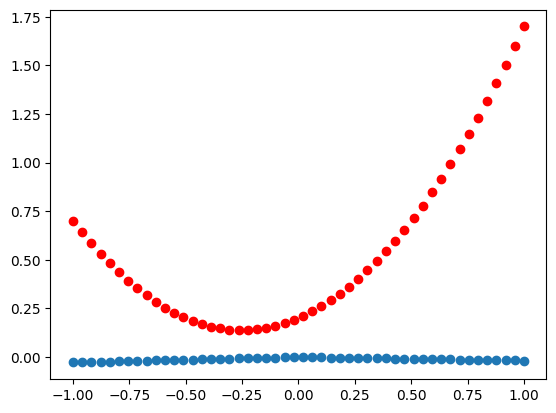

In [79]:
plt.scatter(X_vals, Y_true, color = 'red')
plt.scatter(X_vals, Y_pred)
plt.show()


In [87]:
epochs = 5000
lr = 0.01
for epoch in range(epochs):
    error = 0
    for x, y in zip(X, Y):
        out = x
        for layer in network:
            out = layer.forward(out)
        error += mse(y, out)
        grad = mse_der(y, out)
        for layer in reversed(network):
            grad = layer.backward(grad, lr)
    error /= len(X)
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, MSE {error}")

Epoch 0, MSE 0.000249265529071758
Epoch 500, MSE 0.0002473046447808198
Epoch 1000, MSE 0.00024610781786564654
Epoch 1500, MSE 0.0002453894115459167
Epoch 2000, MSE 0.0002449649000792041
Epoch 2500, MSE 0.0002447169128633138
Epoch 3000, MSE 0.00024457298023476063
Epoch 3500, MSE 0.00024448939392136024
Epoch 4000, MSE 0.0002444402697322877
Epoch 4500, MSE 0.0002444105084656022


In [88]:
import matplotlib.pyplot as plt
X_vals = []
Y_true = []
Y_pred = []
for x, y in zip(X, Y):
    out = x
    for layer in network:
        out = layer.forward(out)
    X_vals.append(x.item())
    Y_true.append(y.item())
    Y_pred.append(out.item())

In [89]:
for x in [-1, -0.5, 0, 0.5, 1]:
    inp = np.array([[x]])
    out = inp
    for layer in network:
        out = layer.forward(out)

    true = x**2 + 0.5*x + 0.2
    print(f"x={x}, predicted={out.item():.3f}, true={true:.3f}")

x=-1, predicted=0.691, true=0.700
x=-0.5, predicted=0.204, true=0.200
x=0, predicted=0.172, true=0.200
x=0.5, predicted=0.657, true=0.700
x=1, predicted=1.670, true=1.700


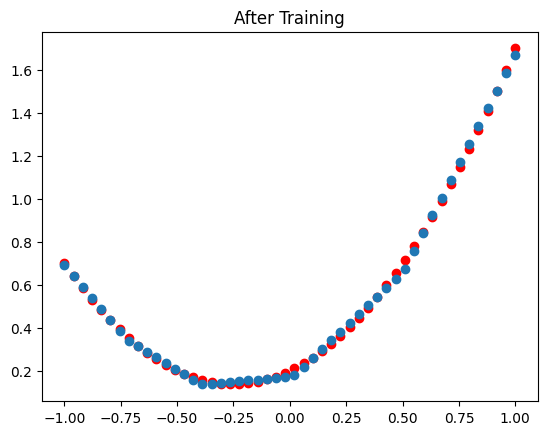

In [92]:
plt.scatter(X_vals, Y_true, color = 'red')
plt.scatter(X_vals, Y_pred)
plt.title("After Training")
plt.show()
